# Individual Assignment M1: Town Economic Data
**OPIM 5509: Introduction to Deep Learning - University of Connecticut**

* Full Name: Prashant Gaikwad
* Student ID (7 digit number): 2994408

---------------------------------------------------------------------------

Each student must complete and submit their own file, but you may work with your group for help. I do not want to see direct copy and pasted code otherwise you will get a zero.

**10 points each. 100 points**

  Use the file below to complete the following data wrangling and regression modeling. Good luck!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.   Import the data, mount your Drive, print df.shape, and use df.info() to look for any missing values.

![MA image](https://upload.wikimedia.org/wikipedia/commons/7/7e/Towns_income_per_capita_in_MA.jpg)

Figure: Map of locations by per capita income. Areas with higher levels of income are shaded darker.

* https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_html('https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income')[2]
df

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,"$105,217","$256,300","$250,000+",11261,10769
1,2,Dover,Town,Norfolk,"$89,476","$187,829","$193,750",6279,5891
2,3,Sherborn,Town,Middlesex,"$82,550","$172,750","$177,845",4301,3541
3,4,Brookline,Town,Norfolk,"$77,585","$160,034","$175,833",59180,38431
4,5,Newton,City,Middlesex,"$73,420","$223,444","$164,063",88593,78427
...,...,...,...,...,...,...,...,...,...
292,296,Amherst,Town,Hampshire,"$19,796","$53,191","$96,733",38651,8583
293,297,Springfield,City,Hampden,"$18,133","$34,311","$39,535",153428,55894
294,298,Lawrence,City,Essex,"$16,987","$32,851","$36,073",76820,26455
295,299,Pelham,Town,Hampshire,"$50,637","$82,596","$94,688",1353,575


# 2. Clean the data. Remove special characters like $ , and + and coerce appropriate columns to numeric.

In [ ]:
#Shape of the data.
df.shape

(297, 9)

In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   297 non-null    int64 
 1   Municipality           297 non-null    object
 2   Type                   297 non-null    object
 3   County                 297 non-null    object
 4   Per capitaincome       297 non-null    object
 5   Medianhouseholdincome  297 non-null    object
 6   Medianfamilyincome     297 non-null    object
 7   Population             297 non-null    int64 
 8   Number ofhouseholds    297 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 21.0+ KB


In [ ]:
# Percentage of missing values
df.isna().sum().sort_values(ascending = False) / (len(df)) * 100 

Rank                     0.0
Municipality             0.0
Type                     0.0
County                   0.0
Per capitaincome         0.0
Medianhouseholdincome    0.0
Medianfamilyincome       0.0
Population               0.0
Number ofhouseholds      0.0
dtype: float64

In [ ]:
# Removing Special characters from the numeric columns

df['Per capitaincome'] = df['Per capitaincome'].str.replace('\W', '')
df['Medianhouseholdincome'] = df['Medianhouseholdincome'].str.replace('\W', '')
df['Medianfamilyincome'] = df['Medianfamilyincome'].str.replace('\W', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [ ]:
# Printing the updated dataset
df.head(5)

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,105217,256300,250000,11261,10769
1,2,Dover,Town,Norfolk,89476,187829,193750,6279,5891
2,3,Sherborn,Town,Middlesex,82550,172750,177845,4301,3541
3,4,Brookline,Town,Norfolk,77585,160034,175833,59180,38431
4,5,Newton,City,Middlesex,73420,223444,164063,88593,78427


In [ ]:
# Checking data types for each columns
df.dtypes

Rank                      int64
Municipality             object
Type                     object
County                   object
Per capitaincome         object
Medianhouseholdincome    object
Medianfamilyincome       object
Population                int64
Number ofhouseholds       int64
dtype: object

In [ ]:
# We need to change the datatypes for some columns from object to numeric
# convert column "a" to int64 dtype and "b" to complex type
df = df.astype({"Per capitaincome": int, "Medianhouseholdincome": int,"Medianfamilyincome": int })

In [ ]:
# Review the changed datatypes
df.dtypes

Rank                      int64
Municipality             object
Type                     object
County                   object
Per capitaincome          int64
Medianhouseholdincome     int64
Medianfamilyincome        int64
Population                int64
Number ofhouseholds       int64
dtype: object

In [ ]:
df.head(5)

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,105217,256300,250000,11261,10769
1,2,Dover,Town,Norfolk,89476,187829,193750,6279,5891
2,3,Sherborn,Town,Middlesex,82550,172750,177845,4301,3541
3,4,Brookline,Town,Norfolk,77585,160034,175833,59180,38431
4,5,Newton,City,Middlesex,73420,223444,164063,88593,78427


In [ ]:
# Checking the categories under Type column
df['Type'].value_counts()

Town     249
City      47
Essex      1
Name: Type, dtype: int64

In [ ]:
# Changing the name of Essex to Other since it has only one count in the entire dataset
df['Type'] = df['Type'].replace(['Essex'],'Other')

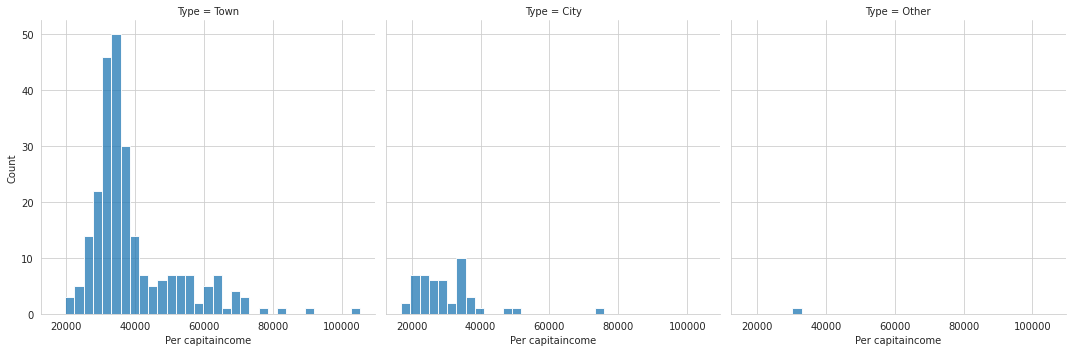

In [ ]:
# Plotting the data distribution
import seaborn as sns
sns.displot(df, x= "Per capitaincome", col = "Type")

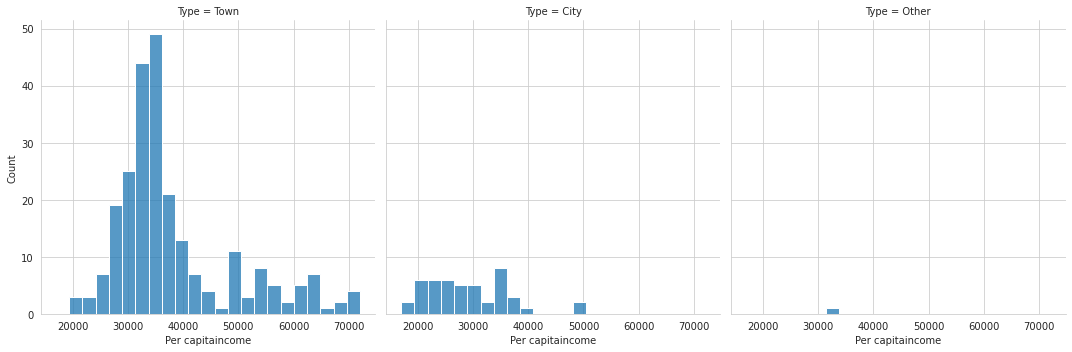

In [ ]:
# Identifying and Cleaning the outliers
upperOutliers = df['Per capitaincome'].quantile(0.98)

#filtering the outliers
df = df[df['Per capitaincome'] < upperOutliers]

# Plotting the data distribution
import seaborn as sns
sns.displot(df, x= "Per capitaincome", col = "Type")

In [ ]:
# Detecting change in number of rows
df.shape

(291, 9)

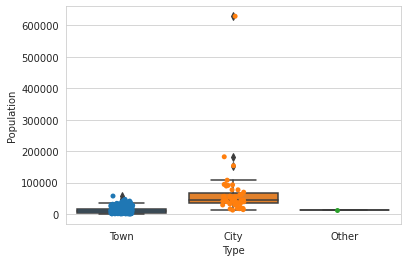

In [ ]:
# Outlier detection for predictor variable - Population

sns.set_style('whitegrid')
ax  = sns.boxplot(x='Type', y='Population', data = df)
ax = sns.stripplot(x='Type', y='Population', data = df)

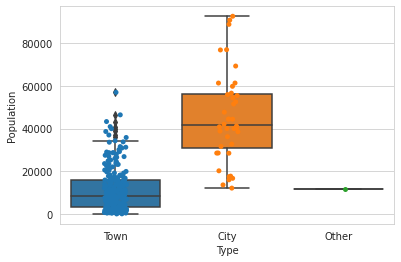

In [ ]:
# Identifying and Cleaning the outliers
upperOutliers = df['Population'].quantile(0.98)

#filtering the outliers
df = df[df['Population'] < upperOutliers]

# Plotting the data distribution
sns.set_style('whitegrid')
ax  = sns.boxplot(x='Type', y='Population', data = df)
ax = sns.stripplot(x='Type', y='Population', data = df)

In [ ]:
# Detecting change in number of rows
df.shape

(285, 9)

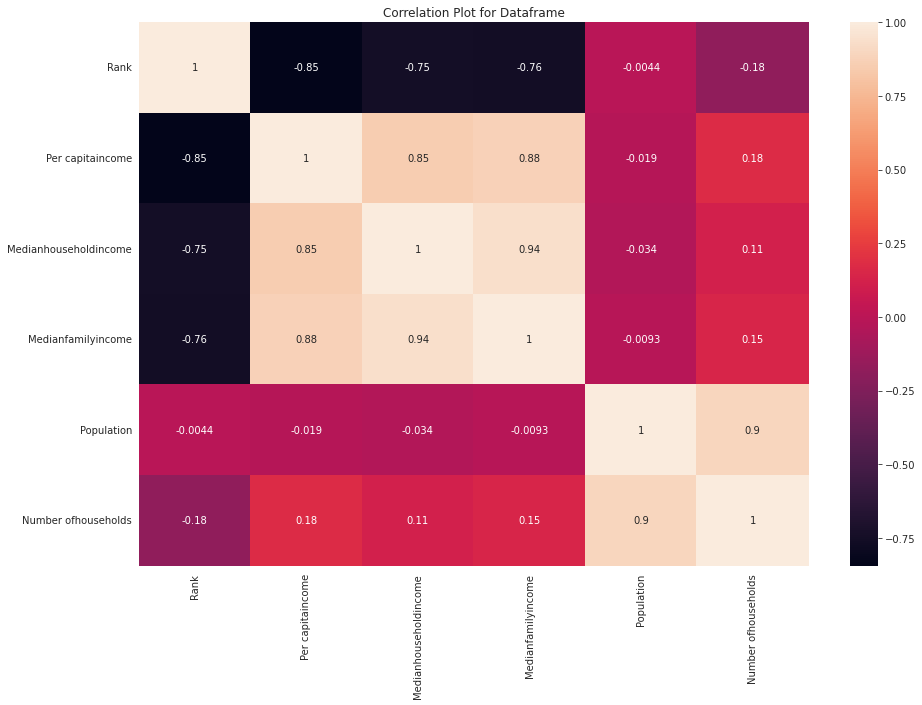

In [ ]:
plt.figure(figsize=(15,10)) #Configuring plot size
plt.title("Correlation Plot for Dataframe")
sns.heatmap(df.corr(),annot=True) #Heatmap for correlation co-efficients 

# 3. Assign Y = to df['Per capitaincome'].


In [ ]:
# Assiging column to Y dataframe for modeling
Y = df['Per capitaincome']


# 4. Subset columns for modeling

* Type
* Population
* Number ofhouseholds

  **Useful link for subsetting rows and columns:** https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

In [ ]:
# Assiging columns to X by subsettting the dataframe for modeling
df1 = pd.get_dummies(df['Type'])
df2 = df[['Population','Number ofhouseholds']]
X = [df1,df2]
X = pd.concat(X, axis = 1)

In [ ]:
X.head()

,City,Other,Town,Population,Number ofhouseholds
6,0,0,1,17669,15544
7,0,0,1,11386,6413
8,0,0,1,5224,1876
9,0,0,1,28747,25084
10,0,0,1,18317,15084


# 5. Split into X_train, X_test, y_train, y_test.
Use an 80/20 split, shuffle the data, and random state equal to YOUR STUDENT ID. Print the shape of X_train, X_test, y_train, y_test.

Convert X_train, X_test, y_train and y_test into numpy arrays. Just overwrite the variables with the numpy arrays like we did in class

In [ ]:
# splitting the dataset into test-train 80-20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 2994408, shuffle = True )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(228, 5) (57, 5) (228,) (57,)


# 6. Use fit_transform() from MinMaxScaler on X_train. Use transform() to apply the MinMaxScaler to X_test.


In [ ]:
cols = X_train.columns
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 154 to 95
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   City                 228 non-null    uint8
 1   Other                228 non-null    uint8
 2   Town                 228 non-null    uint8
 3   Population           228 non-null    int64
 4   Number ofhouseholds  228 non-null    int64
dtypes: int64(2), uint8(3)
memory usage: 6.0 KB


In [ ]:
# Applying scaler transformation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4
count,57.000000,57.0,57.000000,57.000000,57.000000
mean,0.140351,0.0,0.859649,0.180622,0.183636
std,0.350438,0.0,0.350438,0.187995,0.188104
min,0.000000,0.0,0.000000,-0.000454,-0.000075
25%,0.000000,0.0,1.000000,0.054543,0.045828
50%,0.000000,0.0,1.000000,0.124224,0.116222
75%,0.000000,0.0,1.000000,0.266334,0.227353
max,1.000000,0.0,1.000000,0.830771,0.781465


# 7. Fit a random forest model on X_train. Call your model object `clf`. 

Then create two new variables, `train_preds` and `test_preds`, which are the predictions from your model. For example, you will use `train_preds = clf.predict(X_train)` for `X_train` . Calculate error metrics of MAE and R2 for train and test results.

In [ ]:
# Number of trees in random forest
n_estimators = [100,200,300,400,500]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [2,3,4,5]

# Minimum number of samples required to split a node
min_samples_split = [1,2,3]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 3, 4, 5], 'min_samples_split': [1, 2, 3], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


In [ ]:
# Importing the library and assigning the classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf_Model = RandomForestClassifier()

In [ ]:
# Assigning Grid Search for tuning
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
# Fitting the model
# rf_Grid.fit(X_train, y_train)

In [ ]:
# Printing the best paramters
#rf_Grid.best_params_

In [ ]:
# Assigning the best estimator parameters to the model
# clf = rf_Grid.best_estimator_


In [ ]:
# Applying the best parameters using GridSearch to the random forest classifier

clf = RandomForestClassifier(
            n_estimators= 500,
            max_depth = 6,
            max_features= 'auto',
            min_samples_leaf= 2,
            min_samples_split= 3,
            bootstrap=True

)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=500)

In [ ]:
# Assigning the predictors to variables
train_preds= clf.predict(X_train)
test_preds = clf.predict(X_test)

In [ ]:
# Evaluating performance metrix for Training dataset

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from sklearn.metrics import r2_score

MSE_TestData = mean_squared_error(y_train,train_preds)
RMSE_TestData = math.sqrt(MSE_TestData)
MAE_TestData = mean_absolute_error(y_train,train_preds)
R_Square_TestData = r2_score(y_train,train_preds)

print("For Training Dataset \nThe RMSE is: ", RMSE_TestData, "\nThe MAE is : ", MAE_TestData, "\nThe R Squared value is : ", R_Square_TestData)

For Training Dataset 
The RMSE is:  2281.4332089373347 
The MAE is :  338.28508771929825 
The R Squared value is :  0.9582208710350838


In [ ]:
# Evaluating performance metrix for Test dataset

MSE_TestData = mean_squared_error(y_test, test_preds)
RMSE_TestData = math.sqrt(MSE_TestData)
MAE_TestData = mean_absolute_error(y_test, test_preds)
R_Square_TestData = r2_score(y_test, test_preds)

print("For Test Dataset \nThe RMSE is: ", RMSE_TestData, "\nThe MAE is : ", MAE_TestData, "\nThe R Squared value is : ", R_Square_TestData)

For Test Dataset 
The RMSE is:  10546.614554510064 
The MAE is :  7005.824561403509 
The R Squared value is :  -0.303055479164573


# 8. Make two scatterplots of actual vs. predicted. One for train results, one for test results. 
With nicely labeled title and axis (like we did in class).

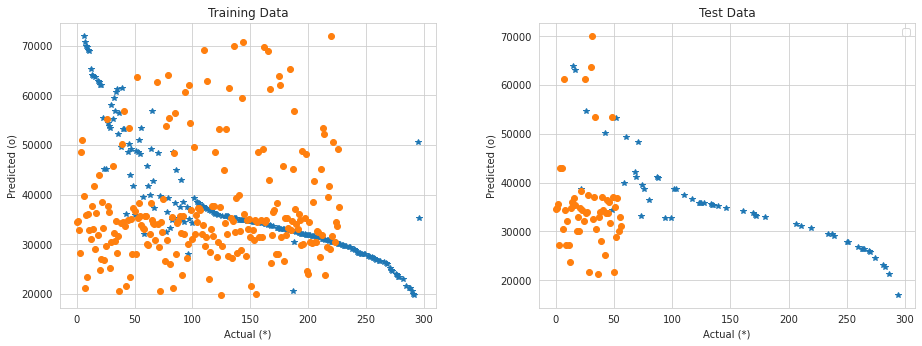

In [ ]:
plt.subplots(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_train, '*')
plt.plot(train_preds, 'o')
plt.xlabel("Actual (*)")
plt.ylabel("Predicted (o)")
plt.title("Training Data")

plt.subplot(1, 2, 2)

plt.plot(y_test, '*')
plt.plot(test_preds, 'o')
plt.xlabel("Actual (*)")
plt.ylabel("Predicted (o)")

plt.title("Test Data")

plt.legend(loc='upper right')
plt.tight_layout(5)
plt.show()

## Predictions using the current Y ~ X are not well because the error is very high.

Adding another variable to improve the accuracy of the model.

In [ ]:
df1 = pd.get_dummies(df['Type'])
df2 = df[['Population','Number ofhouseholds','Medianhouseholdincome','Medianfamilyincome']]
X = [df1,df2]
X = pd.concat(X, axis = 1)
X.head()

,City,Other,Town,Population,Number ofhouseholds,Medianhouseholdincome,Medianfamilyincome
6,0,0,1,17669,15544,159167,186518
7,0,0,1,11386,6413,141849,163012
8,0,0,1,5224,1876,115650,145409
9,0,0,1,28747,25084,125833,141563
10,0,0,1,18317,15084,121036,204033


In [ ]:
# splitting the dataset into test-train 80-20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 2994408, shuffle = True )

# Scaling the model using fit transform method
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Performing the grid search / Hyperparmater tuning to get the best parameters
# rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1)

grid_values = {     
      'n_estimators' : [100,200,300,400,500],
      'max_features' : ['auto', 'sqrt'],
      'max_depth' : [2,3,4,5,6,7,8],
      'min_samples_split' : [2,3,4,5,6,7,8,9,10],
      'min_samples_leaf' : [2,3,4]
}

# rf = RandomForestClassifier()
# grid_search = GridSearchCV(rf, grid_values, cv=3, return_train_score=True)
# grid_search.fit(X_train, y_train)

In [ ]:
# clf = grid_search.best_estimator_
clf = RandomForestClassifier(
                  n_estimators = 500,
                  max_depth = 6,
                  max_features = 'sqrt',
                  min_samples_leaf = 3,
                  min_samples_split= 4,
                  bootstrap = False
)

clf.fit(X_train, y_train)

train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [ ]:
# Evaluating performance metrix for Training dataset
MSE_TestData = mean_squared_error(y_train,train_preds)
RMSE_TestData = math.sqrt(MSE_TestData)
MAE_TestData = mean_absolute_error(y_train,train_preds)
R_Square_TestData = r2_score(y_train,train_preds)

print("For Training Dataset \nThe RMSE is: ", RMSE_TestData, "\nThe MAE is : ", MAE_TestData, "\nThe R Squared value is : ", R_Square_TestData)

For Training Dataset 
The RMSE is:  2605.5821966181247 
The MAE is :  739.1447368421053 
The R Squared value is :  0.9455054061993082


In [ ]:
# Evaluating performance metrix for Test dataset
MSE_TestData = mean_squared_error(y_test, test_preds)
RMSE_TestData = math.sqrt(MSE_TestData)
MAE_TestData = mean_absolute_error(y_test, test_preds)
R_Square_TestData = r2_score(y_test, test_preds)

print("For Test Dataset \nThe RMSE is: ", RMSE_TestData, "\nThe MAE is : ", MAE_TestData, "\nThe R Squared value is : ", R_Square_TestData)

For Test Dataset 
The RMSE is:  4779.632709958503 
The MAE is :  3767.0526315789475 
The R Squared value is :  0.7323755378297641


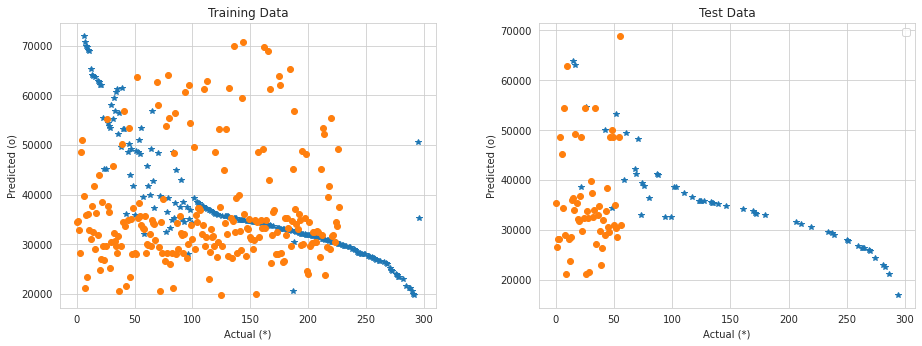

In [ ]:
plt.subplots(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_train, '*')
plt.plot(train_preds, 'o')
plt.xlabel("Actual (*)")
plt.ylabel("Predicted (o)")
plt.title("Training Data")

plt.subplot(1, 2, 2)

plt.plot(y_test, '*')
plt.plot(test_preds, 'o')
plt.xlabel("Actual (*)")
plt.ylabel("Predicted (o)")

plt.title("Test Data")

plt.legend(loc='upper right')
plt.tight_layout(5)
plt.show()

# 9. Apply and evaluate your fitted model to ALL town-level data in Connecticut.

This will require you to prep this new dataset the same way as you did for Massachussetts. Luckily, you should be able to copy/paste most code! You can treat this as another holdout partition - use all rows but only the subset of columns that were used in your model. 

Calculate error metrics and make one scatterplot of actual vs. predicted results for this new holdout sample.

![CT econ data](https://upload.wikimedia.org/wikipedia/commons/6/6d/Connecticut_Towns_by_Median_Household_Income.png)

Figure: Map of municipalities by median household income (ACS 2015-2019). Areas with higher income are shaded more blue, areas with lower income are shaded more red.

*https://en.wikipedia.org/wiki/List_of_Connecticut_locations_by_per_capita_income

In [ ]:
ctData = pd.read_html('https://en.wikipedia.org/wiki/List_of_Connecticut_locations_by_per_capita_income')[2]
ctData.head()

,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,Town,Fairfield,"$105,846","$174,611","$211,875",19738,6857
1,2.0,Darien,Town,Fairfield,"$105,846","$208,848","$343,456",20732,6555
2,3.0,Greenwich,Town,Fairfield,"$90,087","$128,153","$167,825",61171,22083
3,4.0,Weston,Town,Fairfield,"$92,794","$219,868","$285,612",10179,3379
4,5.0,Westport,Town,Fairfield,"$97,395","$181,360","$237,353",26391,9740


In [ ]:
# Removing Special characters from the numeric columns

ctData['Per capitaincome'] = ctData['Per capitaincome'].str.replace('\W', '')
ctData['Medianhouseholdincome'] = ctData['Medianhouseholdincome'].str.replace('\W', '')
ctData['Medianfamilyincome'] = ctData['Medianfamilyincome'].str.replace('\W', '')
ctData['Unnamed: 2'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


Town       147
City        21
Borough      9
State        1
Country      1
Name: Unnamed: 2, dtype: int64

In [ ]:
# Changing the Unnamed: 2 column values to other
ctData['Unnamed: 2'] = ctData['Unnamed: 2'].replace(['Borough','State','Country'],'Other')
ctData['Unnamed: 2'].value_counts()

Town     147
City      21
Other     11
Name: Unnamed: 2, dtype: int64

In [ ]:
# We need to change the datatypes for some columns from object to numeric
ctData =ctData.astype({"Medianhouseholdincome": int, "Per capitaincome": int, "Medianfamilyincome": int })
ctData.dtypes

Rank                     float64
Town                      object
Unnamed: 2                object
County                    object
Per capitaincome           int64
Medianhouseholdincome      int64
Medianfamilyincome         int64
Population                 int64
Number ofhouseholds        int64
dtype: object

In [ ]:
ctData1 = pd.get_dummies(ctData['Unnamed: 2'])

ctData2 = ctData[['Population','Number ofhouseholds','Medianhouseholdincome','Medianfamilyincome']]
X_ctData = [ctData1,ctData2]
X_ctData = pd.concat(X_ctData, axis = 1)
X_ctData.head()

,City,Other,Town,Population,Number ofhouseholds,Medianhouseholdincome,Medianfamilyincome
0,0,0,1,19738,6857,174611,211875
1,0,0,1,20732,6555,208848,343456
2,0,0,1,61171,22083,128153,167825
3,0,0,1,10179,3379,219868,285612
4,0,0,1,26391,9740,181360,237353


In [ ]:
ctData_preds = clf.predict(X_ctData)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
ctData.dtypes

Rank                     float64
Town                      object
Unnamed: 2                object
County                    object
Per capitaincome           int64
Medianhouseholdincome      int64
Medianfamilyincome         int64
Population                 int64
Number ofhouseholds        int64
dtype: object

In [ ]:
# Evaluating performance on the CT Data

MSE_TestData = mean_squared_error(ctData['Per capitaincome'],ctData_preds)
RMSE_TestData = math.sqrt(MSE_TestData)
MAE_TestData = mean_absolute_error(ctData['Per capitaincome'],ctData_preds)
R_Square_TestData = r2_score(ctData['Per capitaincome'],ctData_preds)

print("For CT Data Dataset \nThe RMSE is: ", RMSE_TestData, "\nThe MAE is : ", MAE_TestData, "\nThe R Squared value is : ", R_Square_TestData)

For CT Data Dataset 
The RMSE is:  26982.936298218974 
The MAE is :  25382.26815642458 
The R Squared value is :  -2.099658453393023


# 10. Five good bullets
Write five good bullets about whether or not Massachussetts economic data was able to predict Connecticut economic data.



1.   **Smaller Dataset** :  Massachussetts dataset was smaller with less than 300 rows. Even though I tried using different combination for the best tree *(using grid search and best classifier)* the performance of the tree was very low with high error margin. Larger Dataset might have helped to predict Connecticut economic data with better accuracy.

2.   **Correlation** : For Massachussetts dataset, when I considered the subset data that includes *Type, Population, and number of households*, I found that there is very less correlation *(less than 0.01)*. This indicates that even after hyper parameter tuning, the model was going to overfit and produce less accuracy for the test dataset. This model was not able to perform well on the Connecticut economic data due to very less correlation.

3. **Additional Columns** : Due to less correlation, the MAE was very high when we consider the orginal subset columns *(Type, Population, and number of households)*. When I have added to highly correlated columns *Medianhouseholdincome* and *Medianfamilyincome*, the MAE was reduced with significantly. The performance of the model was very well for the Massachussetts dataset on both test and training dataset. However, the model was not able to perform at all on Connecticut economic data.

4. **Type of Household Column**: The column "Type" has major contribution to the accuracy of the model. For MA dataset, there were 3 types - *Town (249),
City (47), Essex (1)*. We can notice that for *Essex* type we had only 1 record that can either go in train dataset or test dataset. So, model was trained for the third type of household in MA dataset. This also impacted to the CT econmic data because CT data that had more types - *Town (147), City (21), Borough (9), State (1), Country (1).* To minimize the impact I have converted the Types with less count into single type as *Other*. However that too didn't helped to improve the predictions for CT economic data.

5. **Other External Factors** : Besides considering the internal columns contributing to predictions for MA and CT data. We also need to consider whether the data for MA is correlated with the CT data. Considering the household data, it can be the case that the percapita income criteria in MA is totally different than that in CT. For example - due to higher demand, the population, Median House price or the percapita income in Boston, MA can be comparatively much higher than that in Hartford, CT. There can be multiple factors/ columns involved in prediction of the per capita income for both MA and CT. So, the additional number of columns could have helped us in providing better model performance for both CT and MA economic data.

